In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import re
import pylab

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
business_df= pd.read_csv("data/csv/yelp_academic_dataset_business.csv")
review_df= pd.read_csv("data/csv/yelp_academic_dataset_review.csv")

In [4]:
business_df.city.value_counts()

Las Vegas                       22892
Toronto                         14540
Phoenix                         14468
Scottsdale                       6917
Charlotte                        6912
Pittsburgh                       5275
Montréal                         4785
Mesa                             4714
Henderson                        3788
Tempe                            3703
Edinburgh                        3601
Chandler                         3325
Cleveland                        2785
Madison                          2711
Gilbert                          2574
Glendale                         2555
Mississauga                      2094
Stuttgart                        1955
Peoria                           1367
Markham                          1285
North Las Vegas                  1154
Champaign                        1018
North York                        883
Surprise                          853
Scarborough                       781
Richmond Hill                     719
Goodyear    

In [5]:
#======Part 2======
city1="Las Vegas"
city2="Toronto"
city3="Phoenix"
#==================

#======Part 3======
selected_business="Restaurants"
#==================

#======Part 4======
analyse_city=True   #choose to analyse a city or a state
#==================


if analyse_city:
    selected_city="Las Vegas"
else:
    selected_state="NV"

print("Number of Businesses")
print(city1,":",len(business_df[business_df.city==city1]))
print(city2,":",len(business_df[business_df.city==city2]))
print(city3,":",len(business_df[business_df.city==city3]))

Number of Businesses
Las Vegas : 22892
Toronto : 14540
Phoenix : 14468


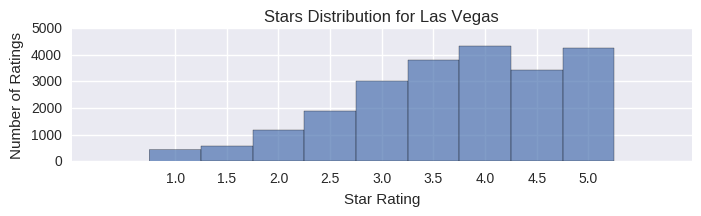

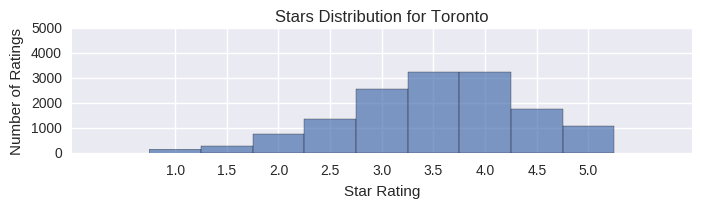

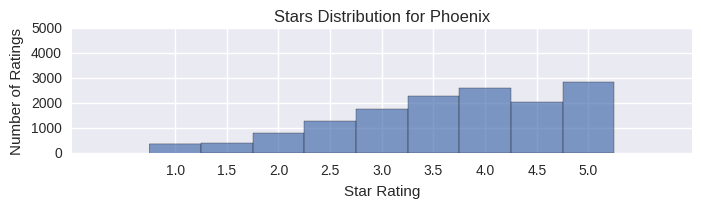

In [10]:
city1_df = business_df[business_df.city == city1]
city2_df = business_df[business_df.city == city2]
city3_df = business_df[business_df.city == city3]

plt.subplots_adjust(hspace=.1)
plt.subplot(311)
plt.hist(city1_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city1))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])
plt.show()

plt.subplot(312)
plt.hist(city2_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city2))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])
plt.show()

plt.subplot(313)
plt.hist(city3_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city3))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])

plt.show()

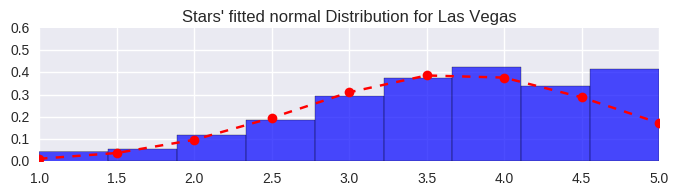

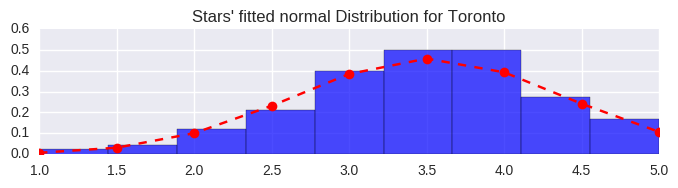

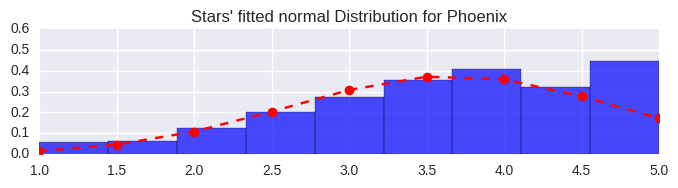

In [12]:
plt.subplots_adjust(hspace=.1)
plt.subplot(311)
(mu, sigma) = stats.norm.fit(city1_df['stars'])
n,bins, patches = plt.hist(city1_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins1 = np.linspace(1,5,9)
y = mlab.normpdf(bins1,mu,sigma)
l = plt.plot(bins1,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {}".format(city1))
plt.show()

plt.subplot(312)
(mu, sigma) = stats.norm.fit(city2_df['stars'])
n,bins, patches = plt.hist(city2_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins2 = np.linspace(1,5,9)
y = mlab.normpdf(bins2,mu,sigma)
l = plt.plot(bins2,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {}".format(city2))
plt.show()

plt.subplot(313)
(mu, sigma) = stats.norm.fit(city3_df['stars'])
n,bins, patches = plt.hist(city3_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins3 = np.linspace(1,5,9)
y = mlab.normpdf(bins3,mu,sigma)
l = plt.plot(bins3,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {}".format(city3))
plt.show()

In [14]:
stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(city1_df.stars)),
                                     city2:list(scipy.stats.describe(city2_df.stars)),
                                     city3:list(scipy.stats.describe(city3_df.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,22892,14468,14540
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.69843,3.67238,3.51575
variance,1.02516,1.12533,0.758642
skewness,-0.567735,-0.57248,-0.400705
kurtosis,-0.318652,-0.414378,-0.093702


In [15]:
c1 = list(scipy.stats.describe(city1_df.stars))
print(c1.append(np.std(city1_df.stars)))

None


In [16]:
print("There are",len(business_df[business_df.categories.isnull()]),"businesses that have no business category")

There are 325 businesses that have no business category


In [17]:
diff_categories=[]
for i in business_df[business_df.categories.notnull()].categories:
    
    current_category=re.findall(r"[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+",i)
    diff_categories+=current_category

diff_categories=set(diff_categories)

print("There are",len(diff_categories),"different business categories")

There are 1192 different business categories


In [18]:
selected_category_indexes=[]
for index in business_df[business_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),business_df.ix[index,"categories"]):
        selected_category_indexes.append(index)

selected_businesses=business_df.ix[selected_category_indexes]
print("There are",len(business_df.ix[selected_category_indexes]),selected_business,"businesses","in the whole dataset")

There are 48485 Restaurants businesses in the whole dataset


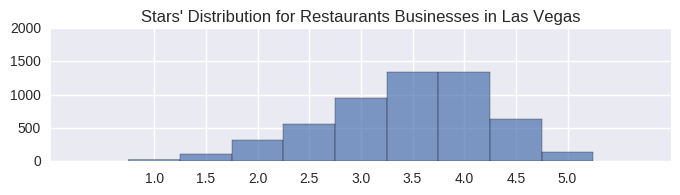

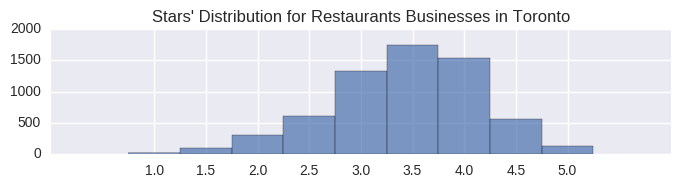

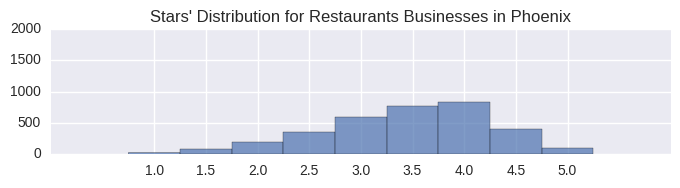

In [23]:
selected_businesses_city1 = selected_businesses[selected_businesses.city==city1]
selected_businesses_city2 = selected_businesses[selected_businesses.city==city2]
selected_businesses_city3 = selected_businesses[selected_businesses.city==city3]

plt.subplots_adjust(hspace=.1)
plt.subplot(311)
n_total, bins, patch = plt.hist(selected_businesses_city1.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city1))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

plt.subplot(312)
n_total, bins, patch = plt.hist(selected_businesses_city2.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city2))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

plt.subplot(313)
n_total, bins, patch = plt.hist(selected_businesses_city3.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city3))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

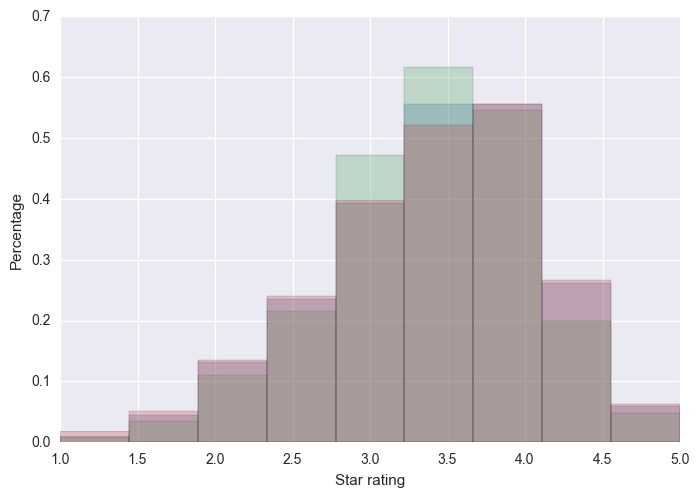

In [67]:
plt.hist(selected_businesses_city1.stars, alpha=.3,bins = 9,normed = True )
plt.hist(selected_businesses_city2.stars, alpha=.3,bins = 9,normed = True )
plt.hist(selected_businesses_city3.stars, alpha=.3,bins = 9,normed = True )
plt.xlabel('Star rating')
plt.ylabel('Percentage')
plt.show()

In [62]:
selected_businesses_stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe\
                                                                    (selected_businesses_city1.stars)),
                                     city2:list(scipy.stats.describe(selected_businesses_city2.stars)),
                                     city3:list(scipy.stats.describe(selected_businesses_city3.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
selected_businesses_stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,5431,3353,6347
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.44872,3.43275,3.42745
variance,0.625409,0.666642,0.534327
skewness,-0.448618,-0.482948,-0.408281
kurtosis,-0.128254,-0.097666,0.123253


### Part 4

In [37]:
if analyse_city:
    review_selected_city=review_df[review_df.business_id.isin(business_df[business_df.city==selected_city].business_id)]
    review_selected_region=review_selected_city
    selected_region=selected_city
else:
    review_selected_state=review_df[review_df.business_id.isin(business_df[business_df.state==selected_state].business_id)]
    review_selected_region=review_selected_state
    selected_region=selected_state

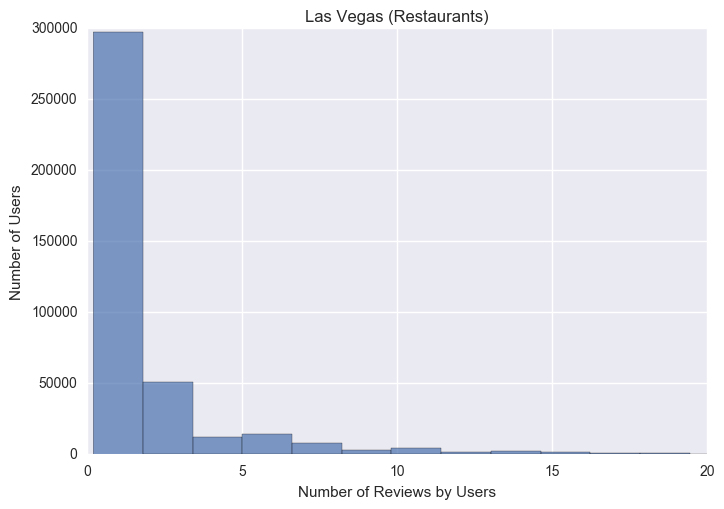

In [38]:
n_total, bins, patch = plt.hist(review_selected_region.user_id.value_counts(),bins=1000,alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,20])
plt.xlabel('Number of Reviews by Users')
plt.ylabel('Number of Users')
plt.show()

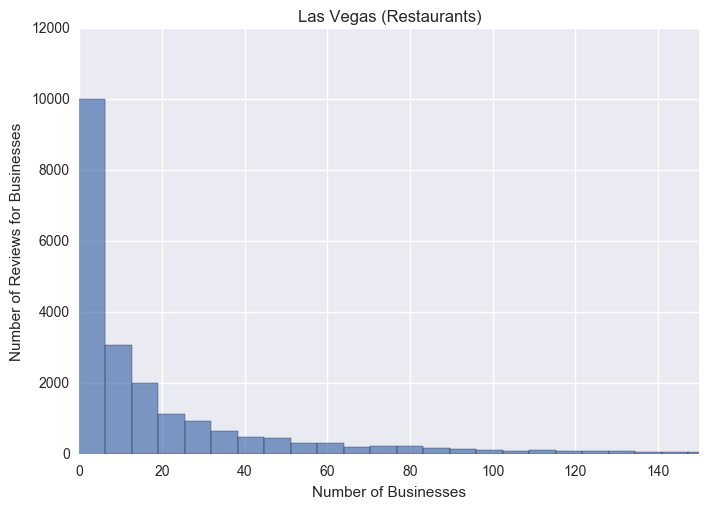

In [39]:
n_total, bins, patch = plt.hist(review_selected_region.business_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,150])
plt.xlabel('Number of Businesses')
plt.ylabel('Number of Reviews for Businesses')
plt.show()

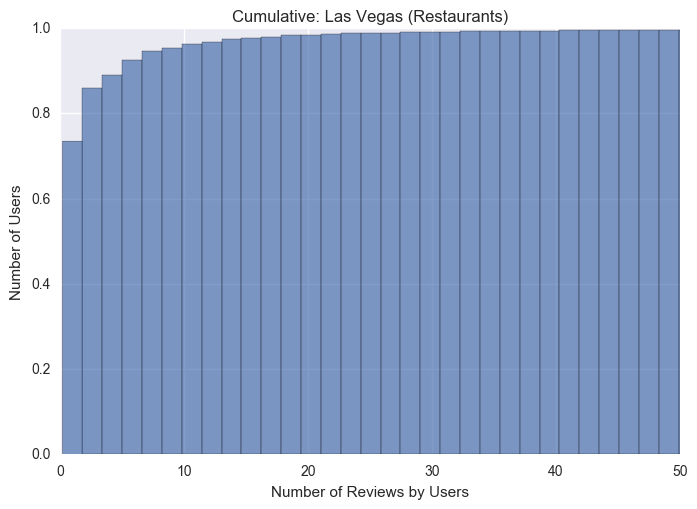

In [44]:
n_total, bins, patch = plt.hist(review_selected_region.user_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=True,cumulative=True)
plt.title("Cumulative: {} ({})".format(selected_region,selected_business))
pylab.xlim([0,50])
plt.xlabel('Number of Reviews by Users')
plt.ylabel('Number of Users')
plt.show()

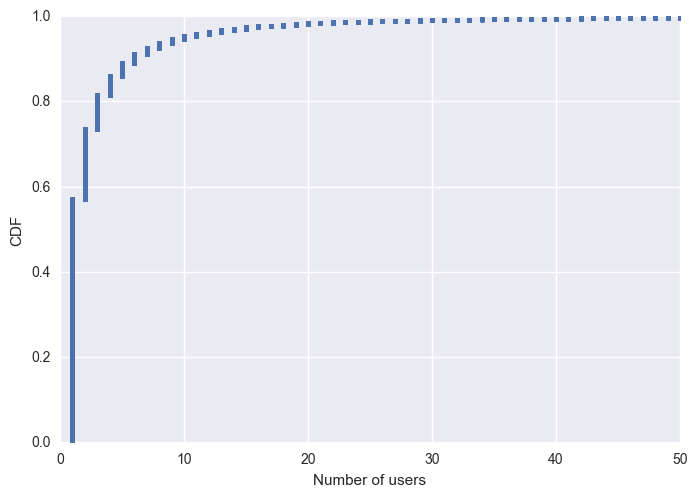

In [53]:
x = np.sort(review_selected_region.user_id.value_counts())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
pylab.xlim([0,50])
plt.xlabel('Number of users')
plt.ylabel('CDF')
plt.show()

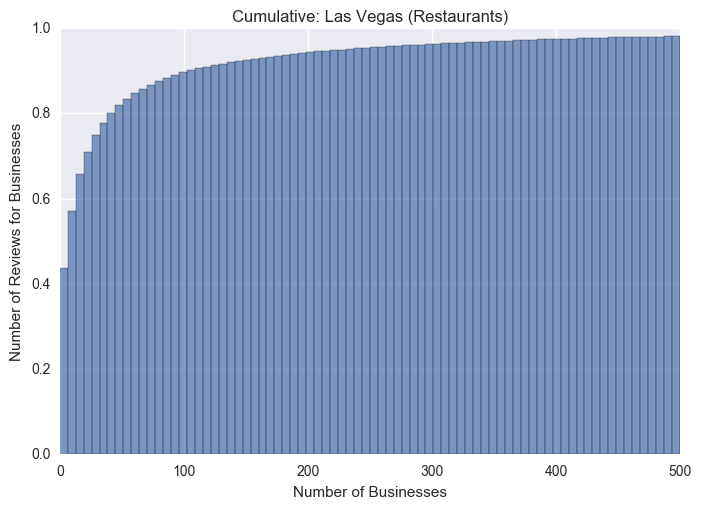

In [54]:
n_total, bins, patch = plt.hist(review_selected_region.business_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=True,cumulative=True)
plt.title("Cumulative: {} ({})".format(selected_region,selected_business))
pylab.xlim([0,500])
pylab.ylim(0,1)
plt.xlabel('Number of Businesses')
plt.ylabel('Number of Reviews for Businesses')
plt.show()

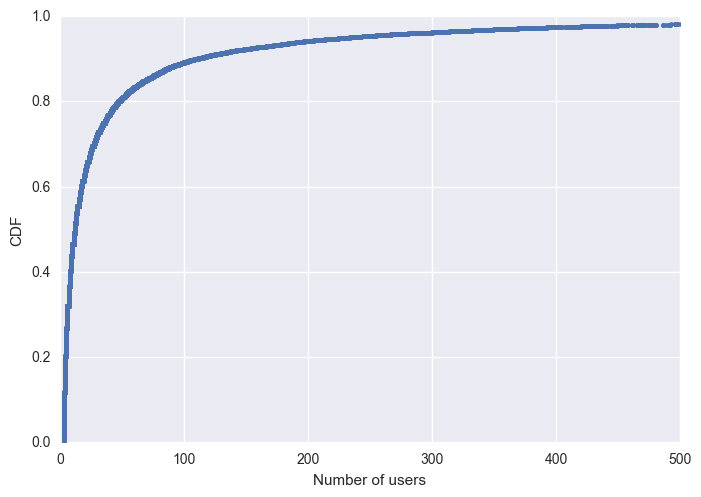

In [56]:
x = np.sort(review_selected_region.business_id.value_counts())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
pylab.xlim([0,500])
plt.xlabel('Number of Businesses')
plt.ylabel('CDF')
plt.show()